id               0
name             0
text             0
label            1
segment_label    0
sentiment        0
n_label          0
dtype: int64
Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1 Score: 0.5
|--- has <= 0.05
|   |--- this <= 0.06
|   |   |--- towards <= 0.05
|   |   |   |--- class: 0
|   |   |--- towards >  0.05
|   |   |   |--- class: 3
|   |--- this >  0.06
|   |   |--- class: 2
|--- has >  0.05
|   |--- class: 1



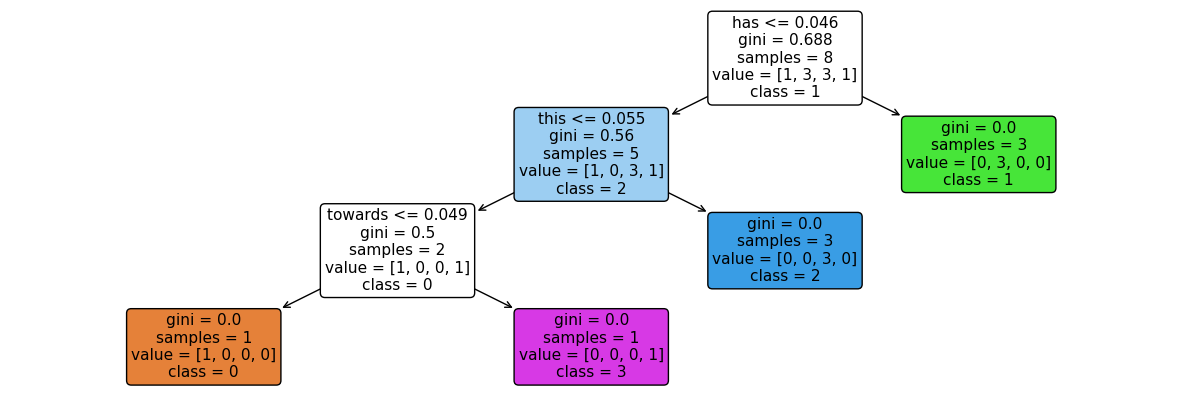

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv('data.csv')

# Check for NaN values
print(data.isnull().sum())

# Handling NaN values by dropping them (you can also impute them)
data.dropna(inplace=True)

# Ensure labels are converted to numerical values
data['label'] = data['label'].astype('category').cat.codes

# Features and target variable
X = data['text']
y = data['label']

# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model with error handling
try:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
except ZeroDivisionError:
    print("One of the metrics resulted in a division by zero error.")
# Print the decision tree
tree_text = export_text(model, feature_names=vectorizer.get_feature_names_out())
print(tree_text)

# Plot the decision tree
plt.figure(figsize=(15,5))
plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=np.unique(y).astype(str), rounded=True)
plt.show()
